# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 50px; font-weight: bold;">Prediction of Diabetes patients</span>

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Description</span>
- We want to train a model that can predict whether a patient with certain medical properties has diabetes or not.
- For such a purpose, we use different techniques to train the model with the highest performance and accuracy.
- The main purpose of the project is to be more familiar with different models and their usecases. Models that are covered in this project includes: Linear Regression, Logistic Regression, Multinomial Logistic Regression, KNN Classifier, and Transfer Learning. We also covered Histogram Features Extraction concept to enrich our dataset and observe differences while using them.

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Motivation</span>
- This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans.
- Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Dataset</span>
- We obtained [**Diabetes prediction**](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset/data) dataset.
- The 'Diabetes prediction dataset' is a collection of medical and demographic data from patients,
along with their diabetes status (positive or negative).
- The data includes features such as age, gender, body mass index (BMI), hypertension, heart
disease, smoking history, HbA1c level, and blood glucose level.

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 30px; font-weight: bold;">Related Works</span>
- [URL: Diabetes dataset 1](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)
- [URL: Diabetes dataset 2](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)
- [URL: Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- [URL: Predict Diabetes dataset](https://www.kaggle.com/datasets/whenamancodes/predict-diabities)

Let's import necessary modules:

In [1]:
if True:
    %pip install -qqq numpy scipy matplotlib pandas scikit-learn seaborn plotly tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Normalizing data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Splitting data to train and test set
from sklearn.model_selection import train_test_split

# Handling missing values
from sklearn.impute import SimpleImputer

# Analysing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Models
from sklearn.neighbors import KNeighborsClassifier

from warnings import filterwarnings
filterwarnings("ignore")

# For transfer Learning
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model

2023-12-27 21:09:59.811598: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Data Understanding</span>

In [3]:
# Define the file path for the dataset
file_path = './diabetes_prediction_dataset-100000.csv'

# Load the dataset from the specified file path using pandas
data = pd.read_csv(file_path)

In [4]:
# Display the first few rows of the DataFrame to preview the data
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [5]:
# Retrieve and display the dimensions of the DataFrame (number of rows and columns)
data.shape

(100000, 9)

In [6]:
# Display a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
# Generate descriptive statistics of DataFrame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [8]:
# Calculate and display the number of missing values in each column of the DataFrame
# We do not have missing values in our dataset
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

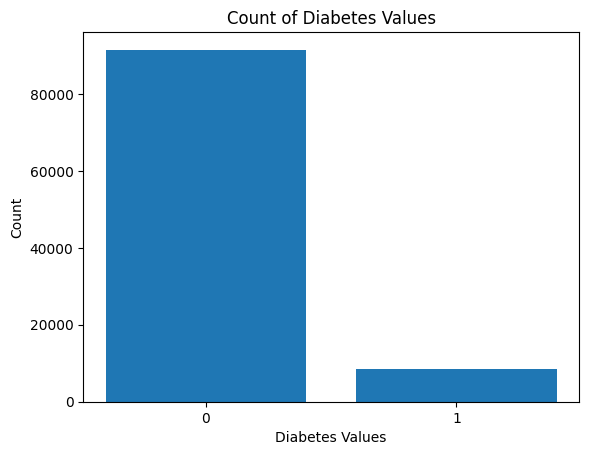

In [9]:
# Creating bar charts

diabetes_counts = data['diabetes'].value_counts()

plt.bar(diabetes_counts.index, diabetes_counts.values)
plt.xlabel('Diabetes Values')
plt.ylabel('Count')
plt.title('Count of Diabetes Values')
plt.xticks(diabetes_counts.index)  # Set x-axis ticks to 0 and 1
plt.show()

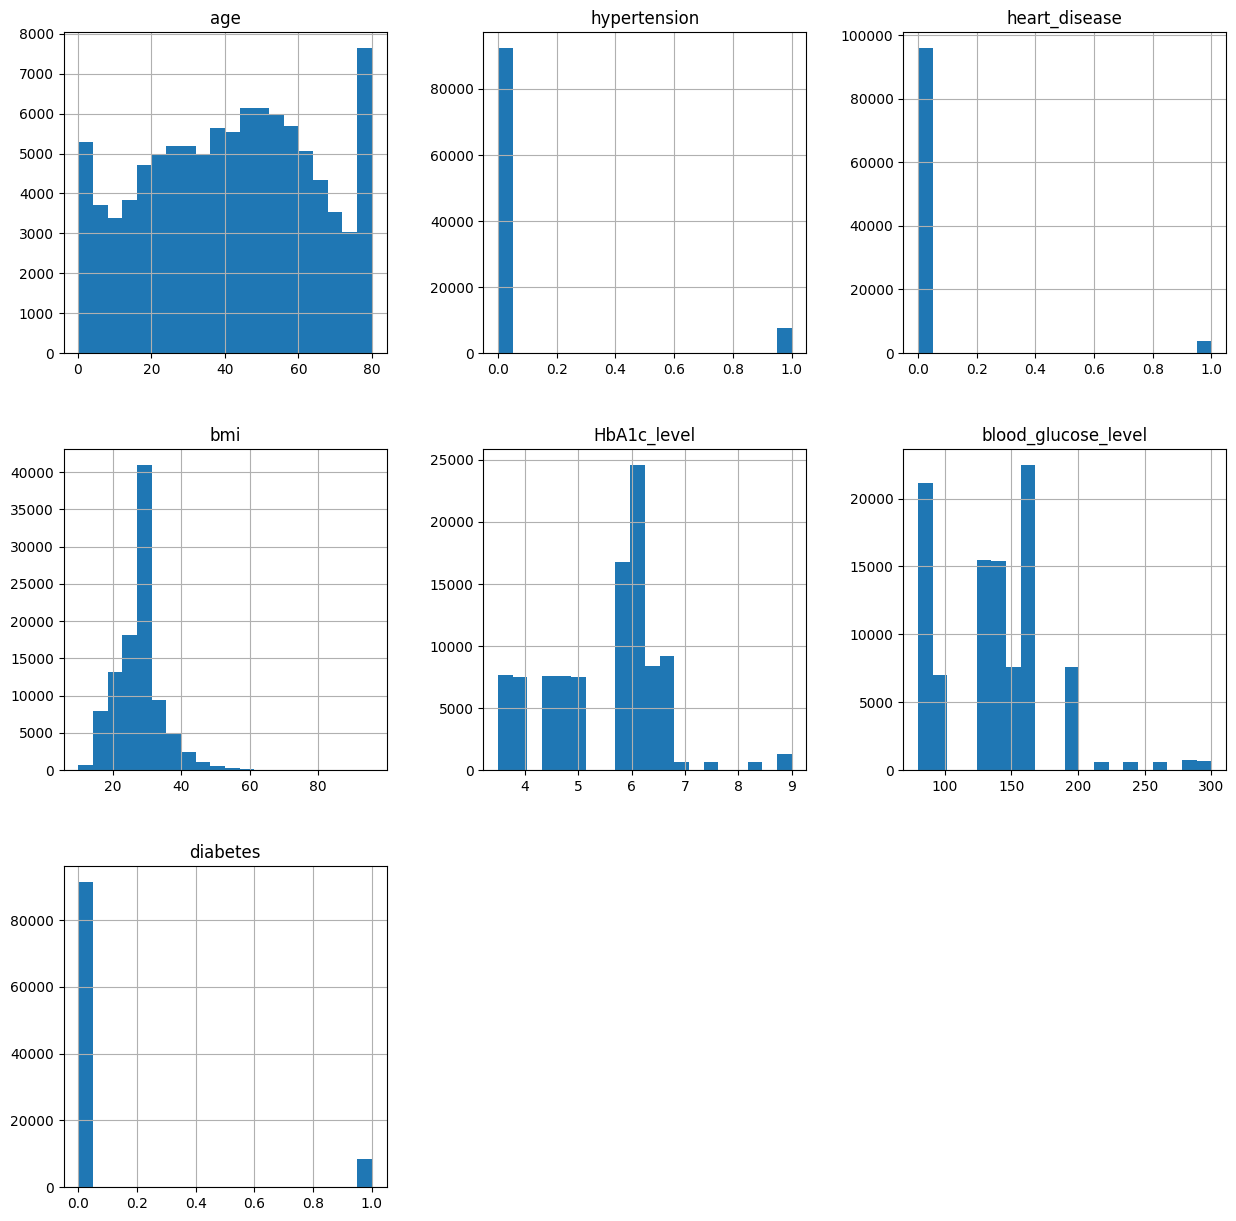

In [10]:
# Plot histograms for each variable
data.hist(figsize=(15, 15), bins=20)
plt.show()

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Data Preparation</span>

### Convet everything to numeric values:

In [11]:
# Replace 'Male' with 0 and 'Female' with 1 in the 'gender' column
data['gender'] = data['gender'].replace({'Male': 0, 'Female': 1})

# Delete rows where 'gender' is 'Other'
data = data[data['gender'] != 'Other']

# Convert the 'gender' column to integer type
data['gender'] = data['gender'].astype(int)

data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,80.0,0,1,never,25.19,6.6,140,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0
2,0,28.0,0,0,never,27.32,5.7,158,0
3,1,36.0,0,0,current,23.45,5.0,155,0
4,0,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,1,80.0,0,0,No Info,27.32,6.2,90,0
99996,1,2.0,0,0,No Info,17.37,6.5,100,0
99997,0,66.0,0,0,former,27.83,5.7,155,0
99998,1,24.0,0,0,never,35.42,4.0,100,0


add two more columns "is_smoker" and "been_smoker" based on the value of the 'smoking_history' column, with the following condition:
iterate through each row,

- if the value for 'smoking_history' is "never" or "ever", add 0 to "is_smoker" and "been_smoker".
- if the value for 'smoking_history' is "current", add 1 to "is_smoker" and "been_smoker".
- if the value for 'smoking_history' is "former", add 0 to "is_smoker" and add 1 to "been_smoker".

In [12]:
# Create 'is_smoker' and 'been_smoker' columns, initializing them with 0
data['is_smoker'] = 0
data['been_smoker'] = 0

# Apply conditions to populate 'is_smoker' and 'been_smoker' columns based on 'smoking_history'
for index, row in data.iterrows():
    if row['smoking_history'] in ['never', 'ever']:
        data.at[index, 'is_smoker'] = 0
        data.at[index, 'been_smoker'] = 0
    elif row['smoking_history'] == 'current':
        data.at[index, 'is_smoker'] = 1
        data.at[index, 'been_smoker'] = 1
    elif row['smoking_history'] == 'former':
        data.at[index, 'is_smoker'] = 0
        data.at[index, 'been_smoker'] = 1
    elif row['smoking_history'] in ['No Info', 'NaN']:
        data.at[index, 'is_smoker'] = -1
        data.at[index, 'been_smoker'] = -1

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,is_smoker,been_smoker
0,1,80.0,0,1,never,25.19,6.6,140,0,0,0
1,1,54.0,0,0,No Info,27.32,6.6,80,0,-1,-1
2,0,28.0,0,0,never,27.32,5.7,158,0,0,0
3,1,36.0,0,0,current,23.45,5.0,155,0,1,1
4,0,76.0,1,1,current,20.14,4.8,155,0,1,1


### Normalizing some columns:
**Min-Max Scaling:** Use when you know the distribution of your data is not normal or when the algorithm you're using expects input features to be on a similar scale (e.g., neural networks, distance-based algorithms like KNN).

**Standardization (Z-score normalization):** Use when your data follows a normal distribution or when your chosen algorithm (e.g., linear regression, logistic regression) assumes normally distributed features. It's also useful when dealing with algorithms that are not scale-sensitive.

In [13]:
# Select columns to be normalized
columns_to_normalize = ['bmi', 'HbA1c_level', 'blood_glucose_level']

# Handling missing values by filling NaNs with the mean of each column
data[columns_to_normalize] = data[columns_to_normalize].fillna(data[columns_to_normalize].mean())


# Normalize columns using Min-Max scaling
# Initialize MinMaxScaler
minmax_scaler = MinMaxScaler()
normalized_columns_minmax = minmax_scaler.fit_transform(data[columns_to_normalize])
# Create new column names for normalized data
minmax_new_column_names = [f"{col}_norm_MinMax" for col in columns_to_normalize]
# Store normalized data in new columns
data[minmax_new_column_names] = normalized_columns_minmax

# Normalize columns using Standardization (Z-score scaling)
# Initialize StandardScaler
standard_scaler = StandardScaler()
normalized_columns_standardized = standard_scaler.fit_transform(data[columns_to_normalize])
# Create new column names for normalized data
standardized_new_column_names = [f"{col}_norm_Standardization" for col in columns_to_normalize]
# Store normalized data in new columns
data[standardized_new_column_names] = normalized_columns_standardized

# Re-order the columns of the data frame
new_column_order = ['gender', 'age', 'bmi', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 'HbA1c_level', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'blood_glucose_level', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 'smoking_history', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes']

# Create a new DataFrame with columns arranged in the new order
data = data[new_column_order]
data.head()

,gender,age,bmi,bmi_norm_MinMax,bmi_norm_Standardization,HbA1c_level,HbA1c_level_norm_MinMax,HbA1c_level_norm_Standardization,blood_glucose_level,blood_glucose_level_norm_MinMax,blood_glucose_level_norm_Standardization,smoking_history,is_smoker,been_smoker,hypertension,heart_disease,diabetes
0,1,80.0,25.19,0.177171,-0.321051,6.6,0.563636,1.001692,140,0.272727,0.047709,never,0,0,0,1,0
1,1,54.0,27.32,0.202031,-0.000114,6.6,0.563636,1.001692,80,0.000000,-1.426157,No Info,-1,-1,0,0,0
2,0,28.0,27.32,0.202031,-0.000114,5.7,0.400000,0.161089,158,0.354545,0.489869,never,0,0,0,0,0
3,1,36.0,23.45,0.156863,-0.583225,5.0,0.272727,-0.492714,155,0.340909,0.416175,current,1,1,0,0,0
4,0,76.0,20.14,0.118231,-1.081957,4.8,0.236364,-0.679515,155,0.340909,0.416175,current,1,1,1,1,0


Check if there are non numeric values in all columns:

In [14]:
columns_to_check = [
    'gender', 'age',
    'bmi', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 
    'HbA1c_level', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 
    'blood_glucose_level', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 
    'smoking_history', 'is_smoker', 'been_smoker', 
    'hypertension', 'heart_disease', 'diabetes'
]

non_numeric_count = {}
for col in columns_to_check:
    # Attempt to convert each column to numeric, coerce errors
    numeric_values = pd.to_numeric(data[col], errors='coerce')
    
    # Count non-numeric values in the column
    non_numeric_count[col] = numeric_values.isnull().sum()

# Print the counts of non-numeric values in each column
for col, count in non_numeric_count.items():
    print(f"Column '{col}' has {count} non-numeric value(s).")

Column 'gender' has 0 non-numeric value(s).
Column 'age' has 0 non-numeric value(s).
Column 'bmi' has 0 non-numeric value(s).
Column 'bmi_norm_MinMax' has 0 non-numeric value(s).
Column 'bmi_norm_Standardization' has 0 non-numeric value(s).
Column 'HbA1c_level' has 0 non-numeric value(s).
Column 'HbA1c_level_norm_MinMax' has 0 non-numeric value(s).
Column 'HbA1c_level_norm_Standardization' has 0 non-numeric value(s).
Column 'blood_glucose_level' has 0 non-numeric value(s).
Column 'blood_glucose_level_norm_MinMax' has 0 non-numeric value(s).
Column 'blood_glucose_level_norm_Standardization' has 0 non-numeric value(s).
Column 'smoking_history' has 99982 non-numeric value(s).
Column 'is_smoker' has 0 non-numeric value(s).
Column 'been_smoker' has 0 non-numeric value(s).
Column 'hypertension' has 0 non-numeric value(s).
Column 'heart_disease' has 0 non-numeric value(s).
Column 'diabetes' has 0 non-numeric value(s).


### Correlation Heatmap

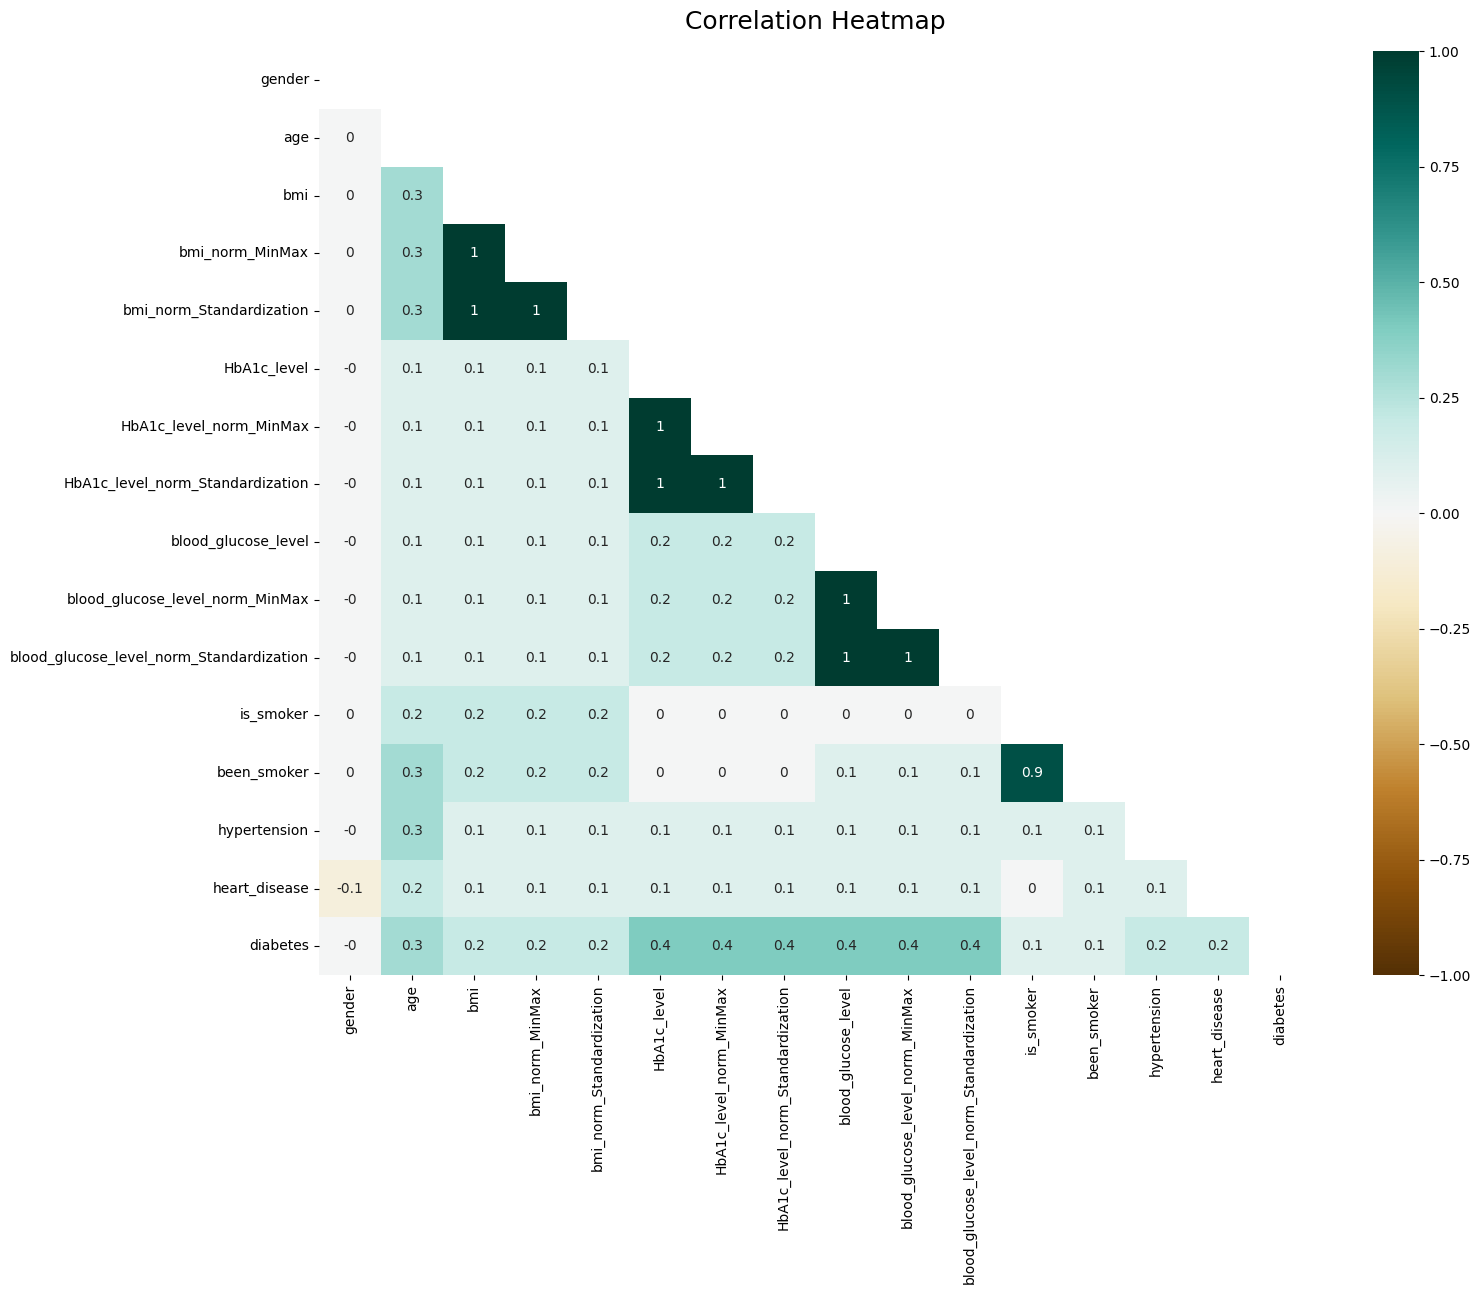

In [15]:
# Dropping 'smoking_history' column from the data
data_without_smoking = data.drop('smoking_history', axis=1)

# Create a Correlation Heatmap
plt.figure(figsize=(16, 12)) 
mask = np.triu(np.ones_like(data_without_smoking.corr(), dtype=bool))  # Use bool directly
heatmap = sns.heatmap(round(data_without_smoking.corr(), 1), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.show()

<Figure size 3000x3000 with 0 Axes>

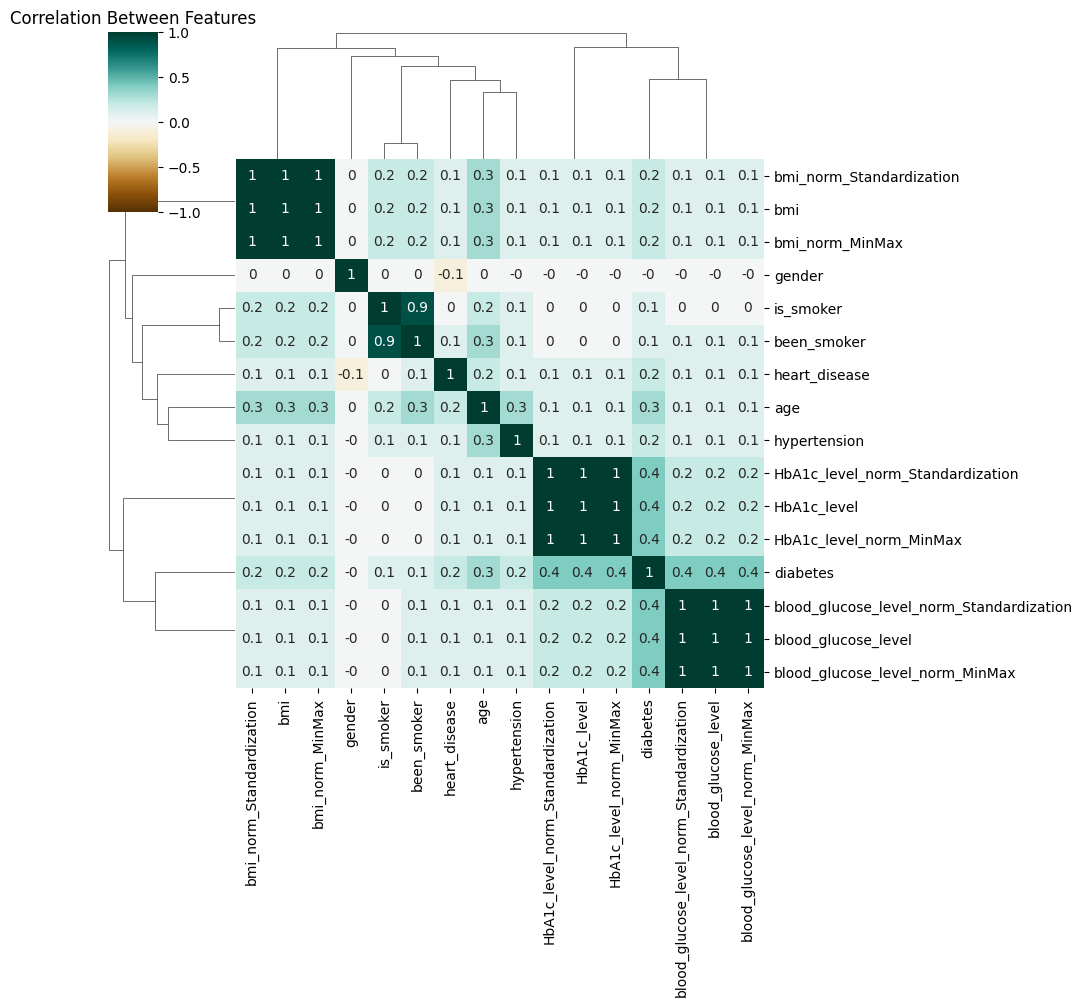

In [16]:
plt.figure(figsize=(30, 30)) 
corr_matrix = round(data_without_smoking.corr(), 1)
sns.clustermap(corr_matrix, annot = True, vmin=-1, vmax=1, cmap='BrBG')
plt.title("Correlation Between Features")
plt.show()

In [17]:
# Save the modified DataFrame to a new CSV file named 'dataset.csv'
data.to_csv('dataset.csv', index=False)

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Splitting the Data</span>

- We should divide the dataset into features (X) and the target variable (y) representing diabetes status.
- Eventually, we need to split our data into training (80%) and testing (20%) sets.

In [18]:
# Load the dataset.csv file into a DataFrame
data = pd.read_csv("dataset.csv")

def split_data(features, target):
    # Split the data into features (X) and target variable (y)
    X = data[features]
    y = data[target]

    # Handling missing values by imputing NaNs with the mean of each column
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

    return X_train, X_test, y_train, y_test


# Represent the shape of splited data:

features = [
    'gender', 'age',
    'bmi', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 
    'HbA1c_level', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 
    'blood_glucose_level', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 
    'is_smoker', 'been_smoker', 
    'hypertension', 'heart_disease', 'diabetes'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)

# Display the shapes of the resulting sets
print("Training set shape - Features:", X_train.shape, " Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, " Target:", y_test.shape)

Training set shape - Features: (79985, 16)  Target: (79985,)
Testing set shape - Features: (19997, 16)  Target: (19997,)


# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Models</span>

## Linear Regression

The Linear Regression class uses Normal Equation method to find the coefficients (weights) for the linear equation $y = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + \dots + \theta_n * x_n$. 

The Normal Equation is a method to directly find the value of theta that minimizes the cost function for linear regression without using iterative methods like gradient descent. 

It involves finding the set of coefficients (theta) that minimizes the sum of the squared differences between predicted and actual values.

In the Linear Regression class, 
- we initialized coefficients and intercept.

In the fit method,
- We took the input features $X$ and target values $y$ to train the linear regression model.
- We added a column of ones to $X$ to account for the intercept term.
- Then we compute coefficients using the Normal Equation: $\theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y$.
- Finally, we assigned intercept and coefficients to \texttt{self.intercept\_} and \texttt{self.coef\_} respectively.

In the predict method,
- Takes input features $X$ and predicts the target variable.
- Checks if the model has been trained (coefficients and intercept are not \texttt{None}).
- Adds a column of ones to $X$ for the intercept term.
- Uses learned coefficients to make predictions: $y = \theta_0 + \theta_1 * x_1 + \theta_2 * x_2 + \dots + \theta_n * x_n$.

In [19]:
class LinearRegression:
    def __init__(self):
        # Initialize coefficients and intercepts as empty
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        # Add a column of ones to X for the intercept term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calculate coefficients using the normal equation: θ = (X^T * X)^-1 * X^T * y
        theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
        
        # Assign the intercept and coefficients to the instance variables
        self.intercept_ = theta[0]
        self.coef_ = theta[1:]

    def predict(self, X):
        if self.coef_ is None or self.intercept_ is None:
            # Check if the model is trained
            raise Exception("Model not trained yet. Please call fit() first.")
        
        # Add a column of ones to X for the intercept term
        X_b = np.c_[np.ones((X.shape[0], 1)), X]
        
        # Calculate predictions: y = θ0 + θ1 * x1 + θ2 * x2 + ...
        # Use the learned coefficients to predict
        y_pred = X_b.dot(np.concatenate(([self.intercept_], self.coef_)))
        
        return y_pred

## Logistic Regression

we wrote the Logistic Regression method using gradient ascent which is more commonly used because Logistic Regression aims to maximize the likelihood function, making ascent more intuitive.
For Logistic Regression, Gradient Ascent, aims to maximize a function and involves moving in the direction of the positive gradient of the log-likelihood to maximize the likelihood function.

Here we defined logistic regression model using gradient ascent to optimize coefficients.
- We first Initialized some parameters including: 
    1) **learning_rate** a rate for the model to learn during gradient ascent, 
    2) **num_iterations** Number of iterations for the gradient ascent optimization process, 
    3) **Threshold**: Threshold used for classification. and 
    4) **self.theta**: Coefficients of the logistic regression.
- We defined the sigmoid Method to map any real-valued number to a value between 0 and 1, to be able to map predictions to probabilities.
- In **predictions** method, we used the current coefficients (self.theta) and the sigmoid function to calculate preediction.
- Then we defined **log likelihood** method that uses the sigmoid function to compute predictions and calculates the log likelihood based on the predicted values compared to actual labels to measure how well the model predicts the observed data.
    \begin{align}
    l(\theta) &= \sum_{i=1}^{m} \left[ y^{(i)} \log(h_{\theta}(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right]
    \end{align}

- In the **fit** method, 
    - we first initialized the coefficients (self.theta) as zeros.
    - We then, iterate and computed predictions using the sigmoid function and updates coefficients using the gradient ascent formula to maximizes the likelihood of the observed data.

- In the **predict** method, we applied the threshold for classification to make predictions using the trained model.

In [20]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, threshold=0.5):
        # Initialize Logistic Regression model
        # parameters for gradient ascent
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.threshold = threshold  # Threshold for classification
        self.theta = None  # Initialize model coefficients

    def sigmoid(self, x):
        # Sigmoid function to map any real-valued number to a value between 0 and 1
        return 1 / (1 + np.exp(-x))

    def predictions(self, features):
        # Compute the predictions using the current theta and sigmoid function
        return self.sigmoid(features.dot(self.theta))

    def log_likelihood(self, x, y):
        # Compute the predictions using the sigmoid function
        h = self.sigmoid(x.dot(self.theta))
        
        # Compute the log likelihood
        return np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

    def fit(self, X, y):
        # Initialize parameters theta with zeros
        self.theta = np.zeros(X.shape[1])

        for i in range(self.num_iterations):
            # Compute gradient ascent
            h = self.sigmoid(np.dot(X, self.theta))
            gradient = np.dot(X.T, (y - h)) / len(y)
            self.theta += self.learning_rate * gradient  # Update theta using gradient ascent

    def predict(self, X):
        # Predict using the trained model with adjusted threshold
        return (self.predictions(X) >= self.threshold).astype(int)


## Multinomial Logistic Regression

We defined the Multinomial Logistic Regression model using gradient descent to optimize weights and biases. 
- We first initialized **learning rate**, **Number of iterations**, **Weights matrix** for the model, **Bias vector** for the model, and **Unique classes** present in the training data.
- in **softmax method**, we normalize raw scores by converting them into probabilities for each class. Then, we subtract the maximum value from the input to improve numerical stability.
- in **fit method**, we compute predictions, calculates the error (difference between predictions and one-hot encoded labels), and updates weights and biases to minimizes the error.
    - we get the dimensions of the input data and the number of unique classes, Initialize weights and biases as zeros, and declare one hot. 
    - **One-hot** encodes the target labels to convert them into a format suitable for multinomial logistic regression. we use one-hot encoding to represent categorical labels as binary vectors, making them compatible with multinomial logistic regression.
    - Then we perform gradient descent to optimize weights and biases by repeatedly updating them using the softmax output and the difference between predictions and one-hot encoded labels.

- In **predict method**, we calculate the model scores by multiplying input features with weights and adding biases. Finally, we compute probabilities for each class using the softmax function and Select the class with the highest probability as the predicted class for each input sample.

In [21]:
class MultinomialLogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        # Initialize model parameters
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.classes = None

    def softmax(self, z):
        # Softmax function to compute probabilities for each class
        exp_scores = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    def fit(self, X, y):
        # Get dimensions
        num_samples, num_features = X.shape
        self.classes = np.unique(y)  # Identify unique classes
        num_classes = len(self.classes)  # Count number of classes

        # Initialize weights and bias
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)

        # One-hot encode the labels
        one_hot_y = np.zeros((num_samples, num_classes))
        for i, cls in enumerate(self.classes):
            one_hot_y[y == cls, i] = 1

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Calculate model scores
            model = np.dot(X, self.weights) + self.bias
            predictions = self.softmax(model)

            # Compute error
            error = predictions - one_hot_y

            # Calculate gradients
            dw = (1 / num_samples) * np.dot(X.T, error)
            db = (1 / num_samples) * np.sum(error, axis=0)

            # Update weights and bias using gradients and learning rate
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Calculate model scores
        model = np.dot(X, self.weights) + self.bias
        predictions = self.softmax(model)
        
        # Select the class with the highest probability for each sample
        return np.argmax(predictions, axis=1)


## k-Nearest Neighbors (KNN) Classifier

KNN is a simple and intuitive algorithm used for classification tasks.
It operates based on the assumption that similar data points should have similar labels.

- first we initialized number of neighbors, training features (self.X_train) and labels (self.y_train).
- in fit method, we stored the training data (features and labels) as KNN is a lazy learning algorithm that doesn't involve explicit training.
- In predict method, 
    - we took test data (X_test) and predicted labels for these test points.
    - Iterated through each test point and calculates the distances between this test point and all the training points (square root of the sum of squared differences to measure the distance between points in a multi-dimensional space).
    - Found the k nearest neighbors based on the smallest distances calculated.
    - Performed majority voting and assigns the most frequently occurring label among its k nearest neighbors as the prediction for the test point.
    - Finally returned an array of predicted labels for all the test points.
    
    

In [22]:
class CustomKNNClassifier:
    def __init__(self, n_neighbors=5):
        # Initialize the KNN model with the number of neighbors
        self.n_neighbors = n_neighbors
        self.X_train = None  # Placeholder for training features
        self.y_train = None  # Placeholder for training labels

    def fit(self, X_train, y_train):
        # Store the training data in the model
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = []  # Store predicted labels
        
        # Iterate through each test point
        for test_point in X_test:
            distances = []  # Store distances from test point to each training point
            
            # Calculate distances from test point to all training points
            for train_point in self.X_train:
                distance = np.sqrt(np.sum((test_point - train_point) ** 2))
                distances.append(distance)
            
            # Find indices of k nearest neighbors
            sorted_indices = np.argsort(distances)
            k_nearest_indices = sorted_indices[:self.n_neighbors]
            
            # Get labels of k nearest neighbors
            k_nearest_labels = [self.y_train[i] for i in k_nearest_indices]
            
            # Predict label for the test point using majority voting
            prediction = max(set(k_nearest_labels), key=k_nearest_labels.count)
            predictions.append(prediction)  # Store the predicted label
        
        return np.array(predictions)  # Return the predicted labels as numpy array

## Tenserflow Adam Neural Network model for Transfer learning:

**Adam Neural Network model** defines a simple feedforward neural network using the Keras functional API.
Adam stands for Adaptive Moment Estimation and combines techniques from two other extensions of stochastic gradient descent: AdaGrad and RMSProp. It computes adaptive learning rates for each parameter by keeping track of both the first and second moments of the gradients.
The optimizer='adam' parameter within the context of training a neural network refers to the optimization algorithm used to update the weights of the network during training.

In the **build_model** method, We defined:
- input_shape as the number of features in our training data.
- Dense layers that create fully connected layers in the network.
- ReLU activation functions that are used for hidden layers, 
- And a sigmoid activation function that is used for the output layer (as it's a binary classification task).

In the **compile** method,
- We configured the model for training with the Adam optimizer and binary cross-entropy loss (suitable for binary classification).
- We specified 'accuracy' as the metric to monitor during training.

in **train** function, 
- we train the model on the training data for 5 epochs with a batch size of 32, to validating the model's performance on the test data during training.

Key features of the **Adam optimizer** include:

- **Adaptivity:** It adapts the learning rates for each parameter, allowing different learning rates for different parameters based on the magnitude of their gradients.
- **Efficiency:** Adam maintains separate adaptive learning rates for each parameter and helps converge faster compared to traditional stochastic gradient descent methods.
- **Handling Sparse Gradients:** It performs well even for sparse gradients and noisy problems.

In [23]:
class Adam_NN:
    def __init__(self):
        self.model = None

    def build_model(self, input_shape):
        inputs = Input(shape=(input_shape,))
        x = Dense(64, activation='relu')(inputs)
        x = Dense(32, activation='relu')(x)
        predictions = Dense(1, activation='sigmoid')(x)
        self.model = Model(inputs=inputs, outputs=predictions)

    def compile_model(self):
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    def train(self, X_train, y_train, X_test, y_test, epochs=5, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Applying Models</span>

Here we have some functions for analyzing mean squared error and r2 score for Linear Regression and accuracy, precision, recall, and F1-score for other models.

### Mean Squared Error (MSE):

MSE helps to understand how far off our predictions are from the actual values, squared (to make everything positive), and then averaged. Lower MSE values show that, on average, our predictions are closer to the real values wich is more accurate.

### R-squared:

R-squared tells us how well our model fits the data.
R-squared measures the proportion of variance in the dependent variable that is explained by the independent variables in the model. Higher R-squared values (closer to 1) indicate that the model explains a larger portion of the variance in the target variable, signifying better fit.

### Accuracy: 

This measures the overall correctness of the model. It's the ratio of correctly predicted instances (both true positives and true negatives) to the total number of instances. 

$Accuracy = \frac{Number\;of\;Correct\;Predictions}{Total\;Number\;of\;Predictions}$

### Precision:

This metric is the ratio of correctly predicted positive observations to the total predicted positive observations. It focuses on the accuracy of positive predictions.

$Precision = \frac{True\;Positives}{True\;Positives\;+\;False\;Positives}$

### Recall (Sensitivity):

This metric is the ratio of correctly predicted positive observations to the all observations in the actual class. It measures the ability of the model to find all the relevant cases within a dataset.

$Recall = \frac{True\;Positives}{True\;Positives\;+\;False\;Negatives}$

### F1 score:

It's the harmonic mean of precision and recall. It provides a balance between precision and recall. F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.

$F1\;Score = \frac{Precision\;\times \;Recall}{Precision\;+\;Recall}$


In [24]:
def evaluate_linear_regression(X_train, X_test, y_train, y_test):
    # Initialize Linear Regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics for regression
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")


def evaluate_logistic_regression(X_train, X_test, y_train, y_test):
    # Initialize Logistic Regression model
    log_reg = LogisticRegression()

    # Train the model
    log_reg.fit(X_train, y_train)

    # Predict probabilities on the test set
    probabilities = log_reg.predictions(X_test)

    # Adjust threshold for classification
    threshold = 0.4  # Adjust this threshold based on precision-recall trade-off
    y_pred = (probabilities >= threshold).astype(int)

    # Calculate evaluation metrics with adjusted threshold
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)


def evaluate_Softmax_regression(X_train, X_test, y_train, y_test):
    # Initialize Custom Multinomial Logistic Regression model
    log_reg = MultinomialLogisticRegression()
    # Train the model
    log_reg.fit(X_train, y_train)

    # Predict on the test set
    predictions = log_reg.predict(X_test)
    
    # Calculate evaluation metrics - Use 'weighted' for multi-class
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

def evaluate_KNN_Classifier(X_train, X_test, y_train, y_test):
    # Initialize KNN Classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

    # Train the classifier
    knn_classifier.fit(X_train, y_train)

    # Predict on the test set
    predictions = knn_classifier.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    
def evaluate_transfer_learning(X_train, X_test, y_train, y_test):    
    adam_nn = Adam_NN()
    adam_nn.build_model(X_train.shape[1])
    adam_nn.compile_model()
    adam_nn.train(X_train, y_train, X_test, y_test)

    # Predicts the classes for the test set and converts the probabilities to binary predictions based on a threshold of 0.5.
    y_pred = adam_nn.model.predict(X_test)
    y_pred_classes = (y_pred > 0.5).astype("int32")

    accuracy = accuracy_score(y_test, y_pred_classes)
    precision = precision_score(y_test, y_pred_classes)
    recall = recall_score(y_test, y_pred_classes)
    f1 = f1_score(y_test, y_pred_classes)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

# <span style="color:#bc5a45; font-family: Trebuchet MS; font-size: 45px; font-weight: bold;">Analyzing Models</span>

## Linear Regression:
Predicting continuous variables like blood glucose level or BMI based on other features:

For evaluating regression models, you typically use metrics like Mean Squared Error (MSE) and R-squared. Metrics like accuracy, precision, recall, and F1-score are commonly used for classification tasks rather than regression.

In [35]:
print("\n #############  Considering real features  ################\n")
# Feature Selection:
# We should identify and use the most relevant features that have a strong correlation with the target variable.
features = [
     'bmi', 'HbA1c_level', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'blood_glucose_level'
X_train, X_test, y_train, y_test = split_data(features, target)
# Evaluate the model using the custom function
evaluate_linear_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering MinMax normalized features  ################\n")
features = [
     'bmi_norm_MinMax', 'HbA1c_level_norm_MinMax', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'blood_glucose_level'
X_train, X_test, y_train, y_test = split_data(features, target)
# Evaluate the model using the custom function
evaluate_linear_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering Standardization normalized features  ################\n")
features = [
     'bmi_norm_Standardization', 'HbA1c_level_norm_Standardization', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'blood_glucose_level'
X_train, X_test, y_train, y_test = split_data(features, target)
# Evaluate the model using the custom function
evaluate_linear_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering both MinMax and Standardization normalized features  ################\n")
features = [
     'bmi_norm_MinMax', 'bmi_norm_Standardization', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'blood_glucose_level'
X_train, X_test, y_train, y_test = split_data(features, target)
# Evaluate the model using the custom function
evaluate_linear_regression(X_train, X_test, y_train, y_test)


 #############  Considering real features  ################

Mean Squared Error: 1354.9938168420365
R-squared: 0.18603569754576132

 #############  Considering MinMax normalized features  ################

Mean Squared Error: 1354.9938168420367
R-squared: 0.1860356975457612

 #############  Considering Standardization normalized features  ################

Mean Squared Error: 1354.9938168420365
R-squared: 0.18603569754576132

 #############  Considering both MinMax and Standardization normalized features  ################

Mean Squared Error: 1960.6773139706384
R-squared: -0.17780710315227322


### Results:
- For achieving better result, the Mean Squared Error should be decreased and R-squared should be increased.
- As can be seen, there are no significant difference in using normalized or unnormalized featured.


## Logistic Regression

Predict the likelihood of a patient having diabetes (positive) or not (negative).


In [26]:
print("\n #############  Considering real features  ################\n")
features = [
     'age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'blood_glucose_level', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
# Apply logistic regression and evaluate
evaluate_logistic_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering MinMax normalized features  ################\n")
features = [
     'age', 'bmi_norm_MinMax', 'blood_glucose_level_norm_MinMax', 'HbA1c_level_norm_MinMax', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_logistic_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering Standardization normalized features  ################\n")
features = [
     'age', 'bmi_norm_Standardization', 'blood_glucose_level_norm_Standardization', 'HbA1c_level_norm_Standardization', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_logistic_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering both MinMax and Standardization normalized features  ################\n")
features = [
     'age', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_logistic_regression(X_train, X_test, y_train, y_test)



 #############  Considering real features  ################

Accuracy: 0.9112366855028254
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

 #############  Considering MinMax normalized features  ################

Accuracy: 0.8852827924188629
Precision: 0.09767441860465116
Recall: 0.03549295774647887
F1 Score: 0.05206611570247934

 #############  Considering Standardization normalized features  ################

Accuracy: 0.9067360104015603
Precision: 0.4729241877256318
Recall: 0.4428169014084507
F1 Score: 0.4573756182717486

 #############  Considering both MinMax and Standardization normalized features  ################

Accuracy: 0.9121368205230784
Precision: 0.5057915057915058
Recall: 0.4428169014084507
F1 Score: 0.47221387804145387


### Result:

- As can be seen, if we do not use normalized data as our features, we end up preecision 0. 
- However, if we use Nrmalized data, we can reach some values for Precision, Recall and F1 Score.
- Using Standardization method is much better than MinMax method of normalization.
- Finally, if we use both methods for normalization, we reach the best results among other evaluations.

## Multinomial Classification (Softmax Regression Model):

Since Multinomial Classification deals with problems where there are more than two classes to predict, we attempt to predict all 3 'diabetes,' 'heart_disease,' and 'hypertension' values based on other features.

In [27]:
def merge_columns(row):
    if row['diabetes'] == 1 or row['heart_disease'] == 1 or row['hypertension'] == 1:
        return 1
    else:
        return 0

# Create a new column for the merged class labels
data['class_label'] = data.apply(merge_columns, axis=1)

print("\n #############  Considering real features  ################\n")
features = [
    'age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'is_smoker', 'been_smoker'
]
target = 'class_label'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_Softmax_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering MinMax normalized features  ################\n")
features = [
     'age', 'bmi_norm_MinMax', 'HbA1c_level_norm_MinMax', 'blood_glucose_level_norm_MinMax', 'is_smoker', 'been_smoker'
]
target = 'class_label'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_Softmax_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering Standardization normalized features  ################\n")
features = [
     'age', 'bmi_norm_Standardization', 'HbA1c_level_norm_Standardization', 'blood_glucose_level_norm_Standardization', 'is_smoker', 'been_smoker'
]
target = 'class_label'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_Softmax_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering both MinMax and Standardization normalized features  ################\n")
features = [
     'age', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 'is_smoker', 'been_smoker'
]
target = 'class_label'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_Softmax_regression(X_train, X_test, y_train, y_test)



 #############  Considering real features  ################

Accuracy: 0.8374256138420764
Precision: 0.7012816587187783
Recall: 0.8374256138420764
F1 Score: 0.7633306659445016

 #############  Considering MinMax normalized features  ################

Accuracy: 0.8374256138420764
Precision: 0.7012816587187783
Recall: 0.8374256138420764
F1 Score: 0.7633306659445016

 #############  Considering Standardization normalized features  ################

Accuracy: 0.8322748412261839
Precision: 0.8302878194230849
Recall: 0.8322748412261839
F1 Score: 0.8312577737226389

 #############  Considering both MinMax and Standardization normalized features  ################

Accuracy: 0.44136620493073964
Precision: 0.8659298929328859
Recall: 0.44136620493073964
F1 Score: 0.4794917545073565


### Result:

- As can be seen, using Nrmalized data can improve all Accuracy, Precision, Recall, and F1 Score.
- Again, Standardization method worked better in compared to MinMax normalization method.
- If we Consider both MinMax and Standardization normalized features, we get the best result possible.

## Histogram Features Extraction:

Instead of directly using blood glucose levels as a feature, we can create histograms to represent the distribution of blood glucose levels for patients and use summary statistics (like mean, variance, skewness) from these histograms as features for our model.

Blood Glucose Level:
Mean:  1149.2183908045977 , Variance:  8363256.53851235 , Skewness:  2.6680658816614895
BMI:
Mean:  298.4537313432836 , Variance:  2177330.928456226 , Skewness:  16.853486661143897


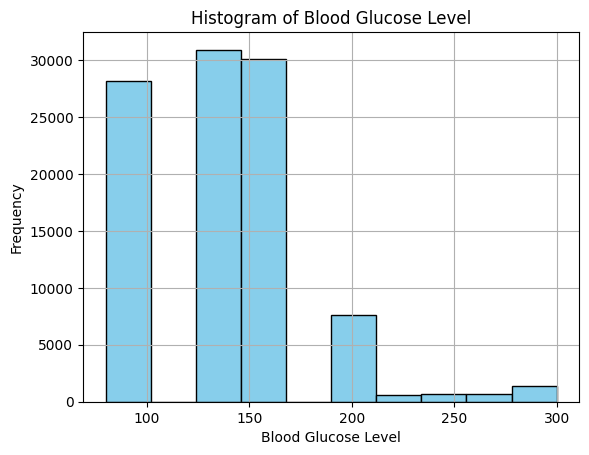

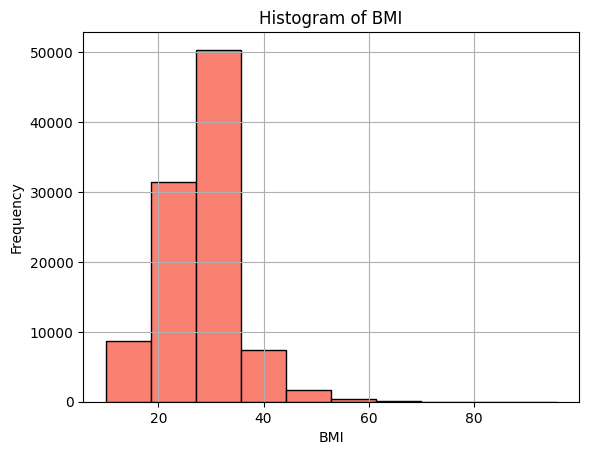

In [29]:
def calculate_histogram_features(data, feature):
    # Generate histogram for the feature
    hist, bin_edges = np.histogram(data[feature], bins='auto')

    # Calculate summary statistics from the histogram
    mean = np.mean(hist)
    variance = np.var(hist)
    skewness = pd.Series(hist).skew()

    return mean, variance, skewness

def extract_histogram_features(data):
    # Calculate histogram features for 'blood_glucose_level' and 'bmi'
    glucose_mean, glucose_variance, glucose_skewness = calculate_histogram_features(data, 'blood_glucose_level')
    bmi_mean, bmi_variance, bmi_skewness = calculate_histogram_features(data, 'bmi')

    return glucose_mean, glucose_variance, glucose_skewness, bmi_mean, bmi_variance, bmi_skewness

# Extract histogram features
glucose_mean, glucose_variance, glucose_skewness, bmi_mean, bmi_variance, bmi_skewness = extract_histogram_features(data)

print("Blood Glucose Level:")
print("Mean: ", glucose_mean, ", Variance: ", glucose_variance, ", Skewness: ", glucose_skewness)
print("BMI:") 
print("Mean: ", bmi_mean, ", Variance: ", bmi_variance, ", Skewness: ", bmi_skewness)

data["glucose_mean"] = glucose_mean
data["glucose_variance"] = glucose_variance
data["glucose_skewness"] = glucose_skewness
data["bmi_mean"] = bmi_mean
data["bmi_variance"] = bmi_variance
data["bmi_skewness"] = bmi_skewness
data.head()

# Plot histogram for 'blood_glucose_level'
plt.hist(data['blood_glucose_level'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Blood Glucose Level')
plt.xlabel('Blood Glucose Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram for 'bmi'
plt.hist(data['bmi'], bins=10, color='salmon', edgecolor='black')
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [30]:
print("Logistic Regression Model:")
print("\n #############  Using actual features  ################\n")
features = [
     'bmi', 'HbA1c_level', 'hypertension', 'heart_disease', 'blood_glucose_level'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_logistic_regression(X_train, X_test, y_train, y_test)

print("\n #############  Considering mean, variance, and skewness for glucose_level and bmi features  ################\n")
features = [
     'HbA1c_level','hypertension', 'heart_disease','bmi_mean', 'bmi_variance', 'bmi_skewness', 'glucose_mean', 'glucose_variance', 'glucose_skewness'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_logistic_regression(X_train, X_test, y_train, y_test)


print("\n---------------------------------------------------------\n")
print("Linear Regression Model:")
print("\n #############  Using actual features  ################\n")
features = [
    'bmi', 'HbA1c_level', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'blood_glucose_level'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_linear_regression(X_train, X_test, y_train, y_test)
print("\n #############  Using mean, variance, and skewness for glucose_level and bmi features  ################\n")
features = [
     'bmi_mean', 'bmi_variance', 'bmi_skewness', 'HbA1c_level', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'blood_glucose_level'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_linear_regression(X_train, X_test, y_train, y_test)

Logistic Regression Model:

 #############  Using actual features  ################

Accuracy: 0.9112366855028254
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

 #############  Considering mean, variance, and skewness for glucose_level and bmi features  ################

Accuracy: 0.9112366855028254
Precision: 0.0
Recall: 0.0
F1 Score: 0.0

---------------------------------------------------------

Linear Regression Model:

 #############  Using actual features  ################

Mean Squared Error: 1354.9938168420365
R-squared: 0.18603569754576132

 #############  Using mean, variance, and skewness for glucose_level and bmi features  ################

Mean Squared Error: 1355.2540408736168
R-squared: 0.18587937722184966


### Result:

As can be seen, using mean, variance, and skewness for BMI instead of just BMI itseelf does NOT improve the results of model regarding Logistic regression. However, it slightly improves the the results for Linear regression model. (leads to less Mean Squared Error and a bit more R-squared value.)

## KNN Classifier:

Train a KNN (K-Nearest Neighbors) Classifier using the dataset's features and corresponding labels.

In [31]:
print("\n #############  Considering real features  ################\n")
features = [
    'age', 'bmi','blood_glucose_level', 'HbA1c_level', 'blood_glucose_level', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_KNN_Classifier(X_train, X_test, y_train, y_test)

print("\n #############  Considering MinMax normalized features  ################\n")
features = [
     'age', 'bmi_norm_MinMax', 'blood_glucose_level_norm_MinMax', 'HbA1c_level_norm_MinMax', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_KNN_Classifier(X_train, X_test, y_train, y_test)

print("\n #############  Considering Standardization normalized features  ################\n")
features = [
     'age', 'bmi_norm_Standardization', 'blood_glucose_level_norm_Standardization', 'HbA1c_level_norm_Standardization', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_KNN_Classifier(X_train, X_test, y_train, y_test)

print("\n #############  Considering both MinMax and Standardization normalized features  ################\n")
features = [
     'age', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease', 'diabetes'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_KNN_Classifier(X_train, X_test, y_train, y_test)


 #############  Considering real features  ################

Accuracy: 0.9532929939490924
Precision: 0.8833181403828624
Recall: 0.5459154929577464
F1 Score: 0.674791086350975

 #############  Considering MinMax normalized features  ################

Accuracy: 0.9992998949842476
Precision: 1.0
Recall: 0.992112676056338
F1 Score: 0.9960407239819004

 #############  Considering Standardization normalized features  ################

Accuracy: 0.9927489123368505
Precision: 0.9987760097919217
Recall: 0.9194366197183098
F1 Score: 0.9574655324141977

 #############  Considering both MinMax and Standardization normalized features  ################

Accuracy: 0.9925488823323498
Precision: 0.9987730061349693
Recall: 0.9171830985915493
F1 Score: 0.9562408223201176


### Result:

- As can be seen, using normalized data can improve KNN better than other models. Here we can observe that using MinMax normalized features, in comparison with Standardization normalized features, can reach the most Accuracy, Precision, Recall and F1-score. 
- Besides, Using both MinMax and Standardization normalized features at the same time, wan NOT a good idea and although the results are better than real features, they are worse than MinMax and Standardization as individual normalization models.

## Transfer Learning:

- We should select a pre-trained model based on the Related Works datasets related to medical data.
- Then, extract relevant features from the pre-trained model layers and adjust specific layers of the pre-trained model by retraining them on our diabetes dataset.

"""


In [32]:
print("Compare Our logistic regression model to Tenserflow adam model")
features = [
     'age', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'is_smoker', 'been_smoker', 'hypertension', 'heart_disease'
]
target = 'diabetes'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_logistic_regression(X_train, X_test, y_train, y_test)
evaluate_transfer_learning(X_train, X_test, y_train, y_test)

print("Compare Our Multinomial Classification model to Tenserflow adam model")
features = [
     'age', 'bmi_norm_MinMax', 'bmi_norm_Standardization', 'HbA1c_level_norm_MinMax', 'HbA1c_level_norm_Standardization', 'blood_glucose_level_norm_MinMax', 'blood_glucose_level_norm_Standardization', 'is_smoker', 'been_smoker'
]
target = 'class_label'
X_train, X_test, y_train, y_test = split_data(features, target)
evaluate_Softmax_regression(X_train, X_test, y_train, y_test)
evaluate_transfer_learning(X_train, X_test, y_train, y_test)


Compare Our logistic regression model to Tenserflow adam model
Accuracy: 0.8966845026754013
Precision: 0.4031936127744511
Recall: 0.3414084507042254
F1 Score: 0.36973764490543015
Epoch 1/5
2500/2500 [==============================] - 5s 2ms/step - loss: 0.1387 - accuracy: 0.9538 - val_loss: 0.1237 - val_accuracy: 0.9540
Epoch 2/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1183 - accuracy: 0.9589 - val_loss: 0.1180 - val_accuracy: 0.9586
Epoch 3/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1099 - accuracy: 0.9618 - val_loss: 0.1015 - val_accuracy: 0.9646
Epoch 4/5
2500/2500 [==============================] - 4s 2ms/step - loss: 0.1024 - accuracy: 0.9645 - val_loss: 0.1070 - val_accuracy: 0.9625
Epoch 5/5
625/625 [==============================] - 1s 1ms/step
Accuracy: 0.9671450717607641
Precision: 0.9177877428998505
Recall: 0.691830985915493
F1 Score: 0.7889495663347255
Compare Our Multinomial Classification model to Tenserflow adam model


### Result:

- As can be seen, the pre-trained tensorflow model as "adam" works way better than our simple Logistic Regression in every metrics.

## Conclusion:

After trying multiple models to predict diabetes patients, we found different approaches work better for different models. Some procedures including feature selection and normalization, made the models better. especially using Standardization in Logistic and SoftMax models. However, for KNN, using MinMax made a big difference. Feature extraction in our case, did not help us with the results, and finally, trying Transfer Learning was much better than the simple models we started with. Overall, by testing different ways, we can find better methods to help practitioners treat patients better